<a href="https://colab.research.google.com/github/MahardhikaB/PCVK/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.**

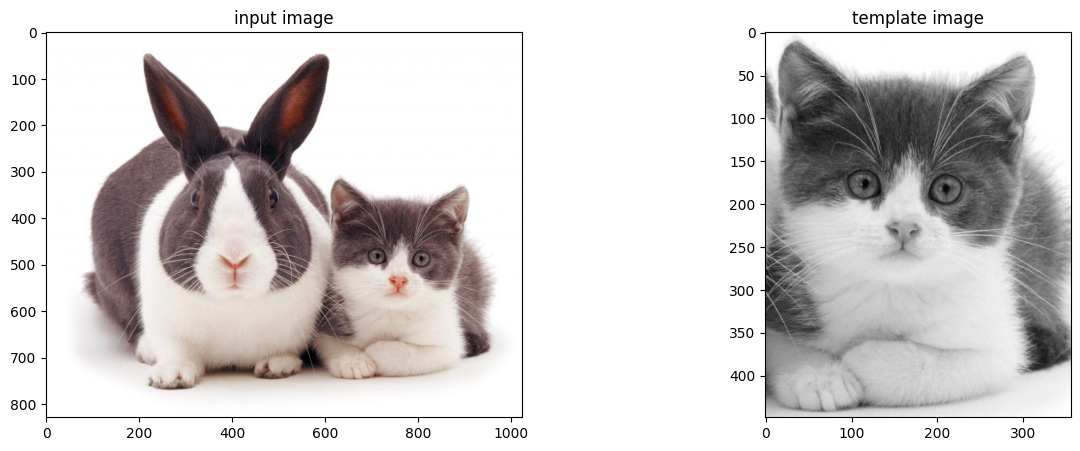

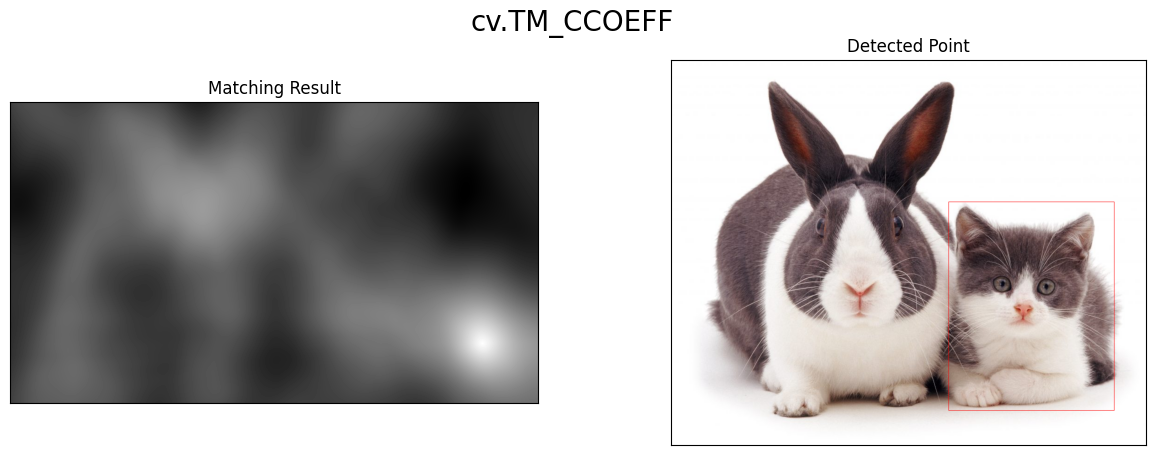

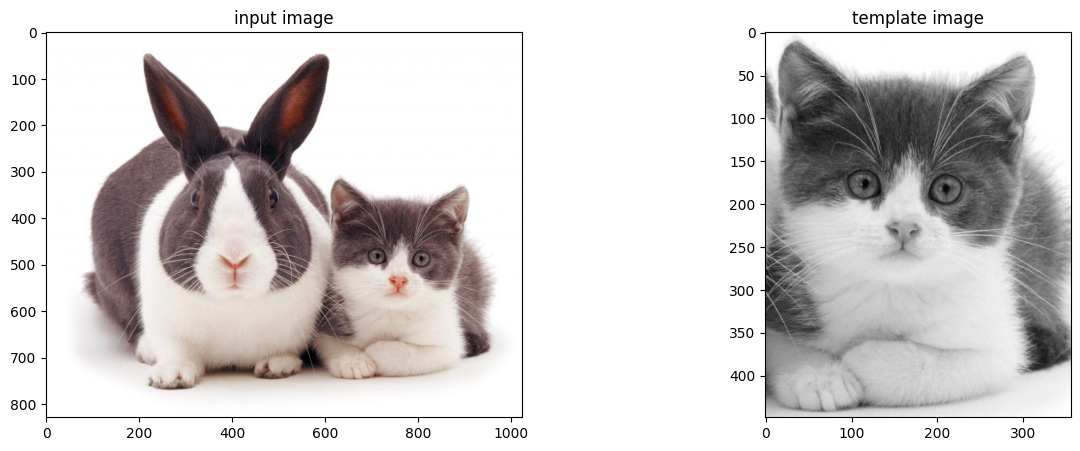

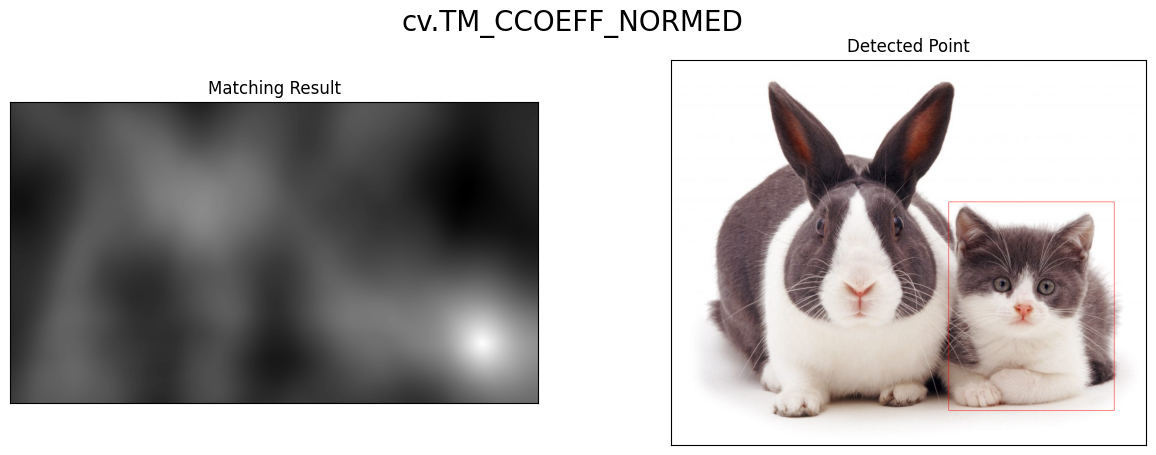

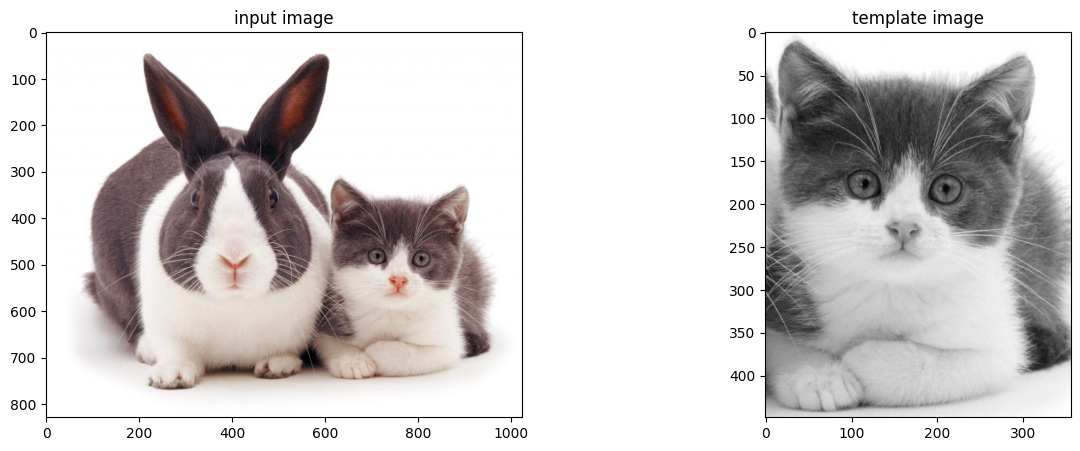

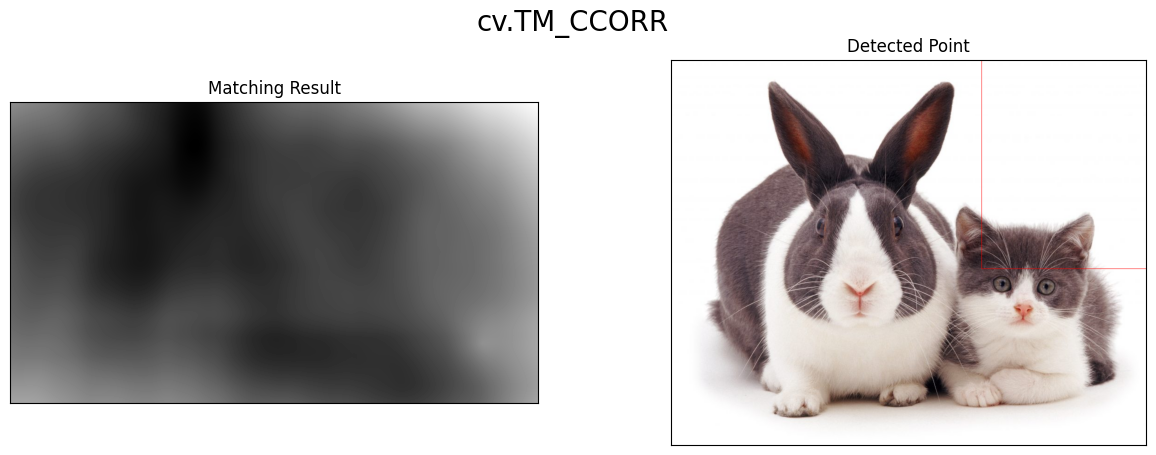

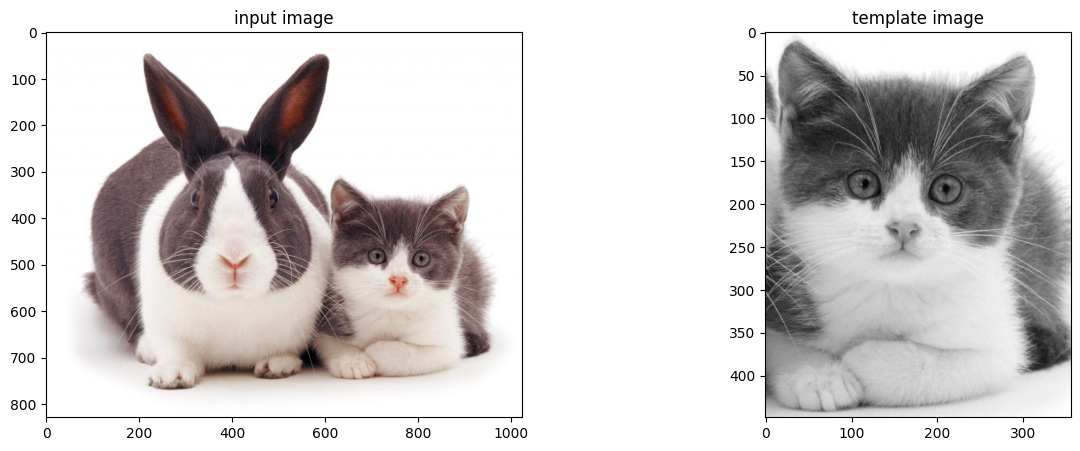

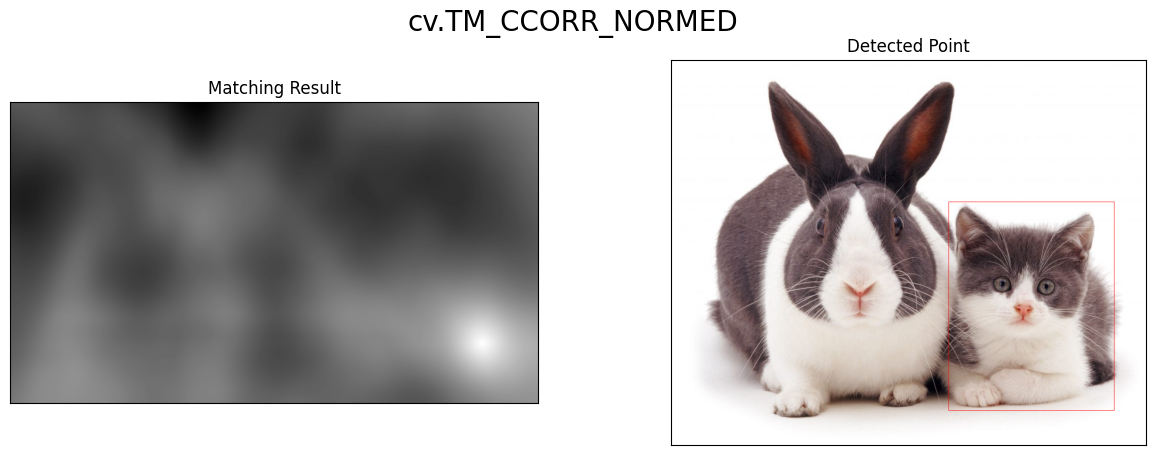

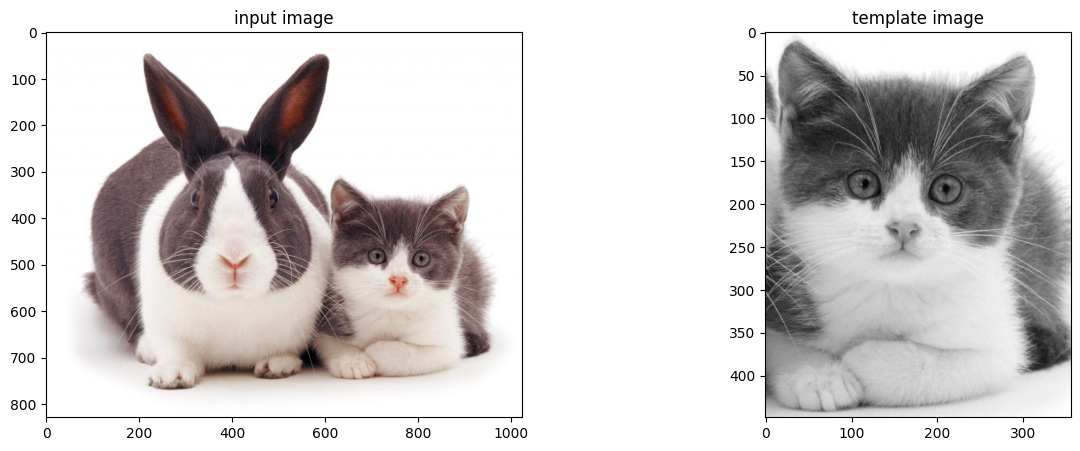

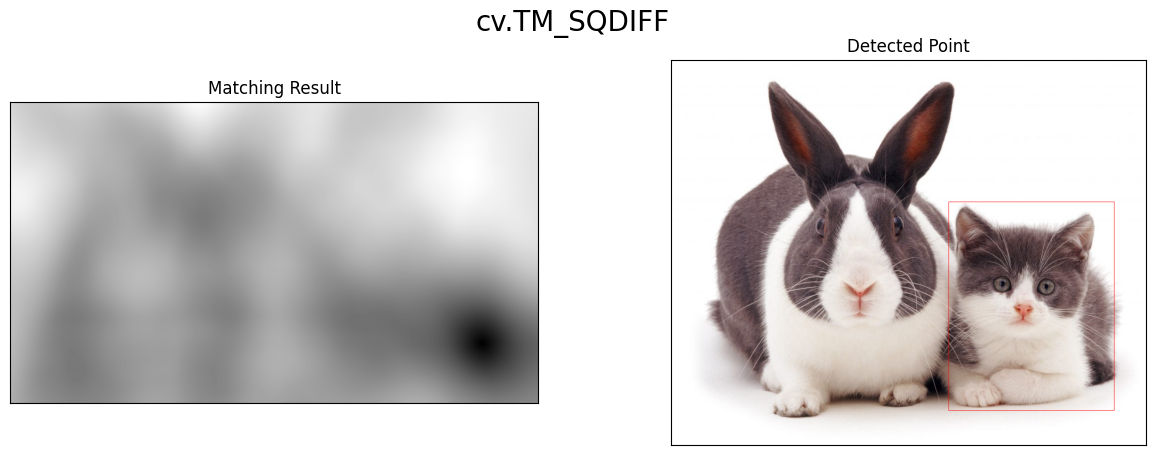

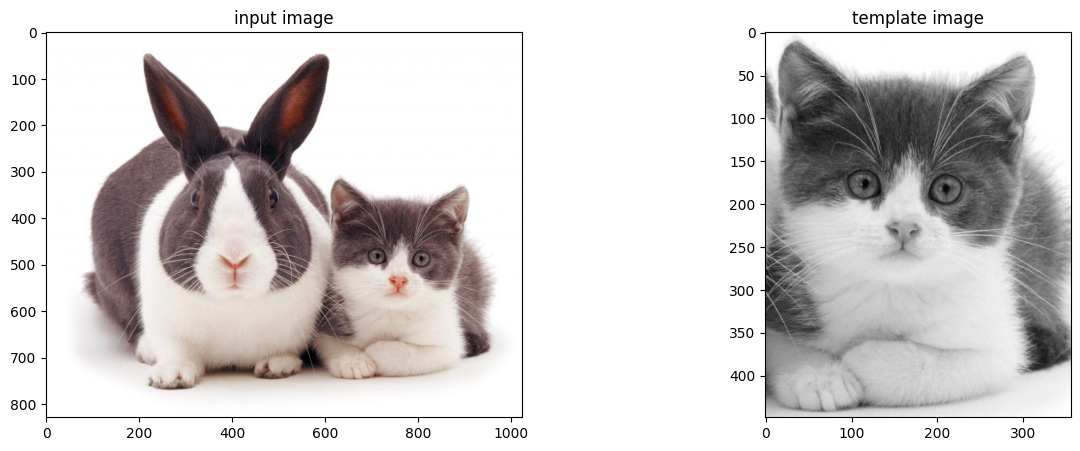

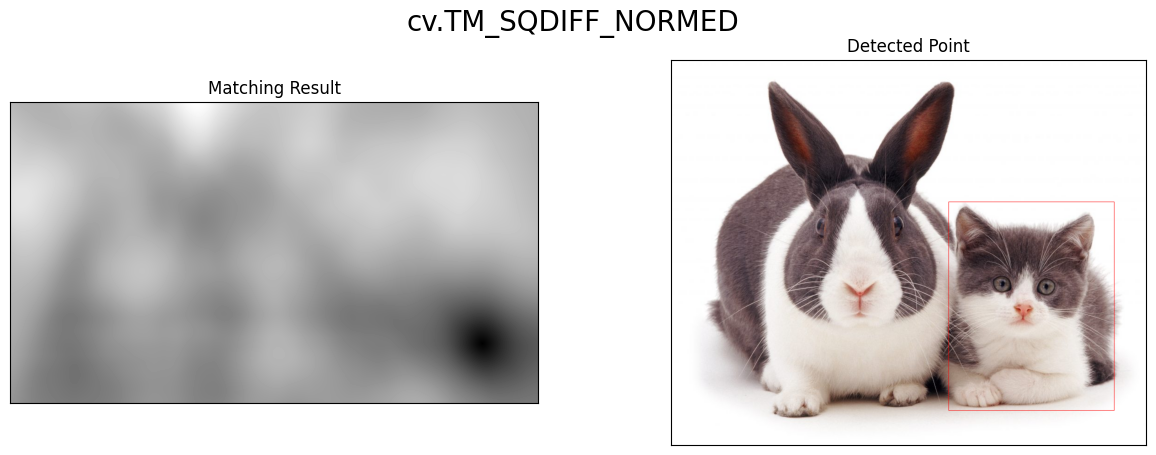

In [ ]:
def template_matching(img, template, method):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_copy = img.copy()
    w, h = template.shape[::-1]

     # print input image dan template
    f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
    axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
    axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)


    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255))

    return img_copy, res

img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg', 0)

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method_str in methods:
    method = eval(method_str)
    result_img, result_res = template_matching(img, template, method)

    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(result_res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method_str, fontsize=20)
    plt.show()

**Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:**

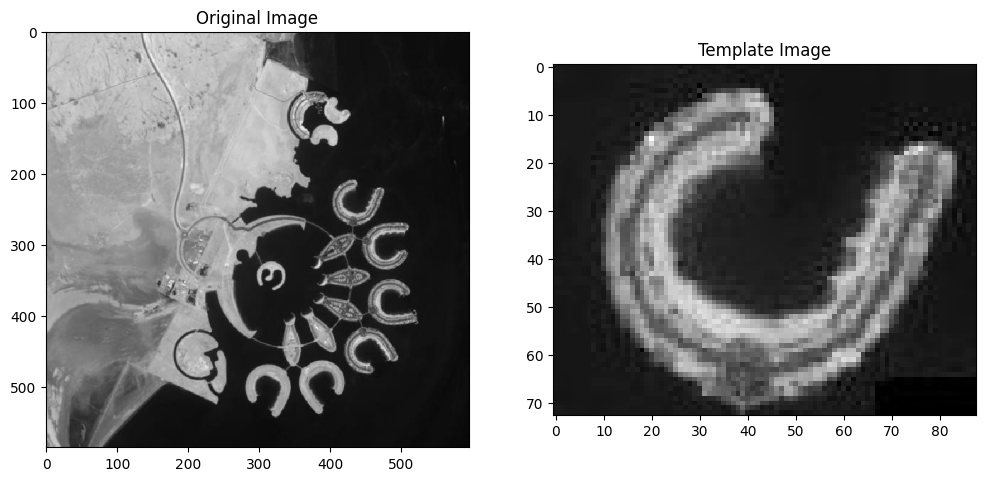

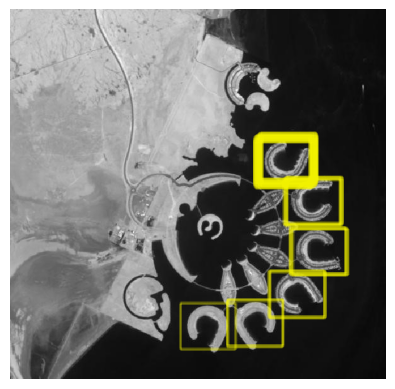

In [ ]:
from skimage.feature import match_template

image = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg', 0)
template_image = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg', 0)

fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title("Original Image")
axarr[1].imshow(template_image, cmap='gray')
axarr[1].set_title("Template Image")

# Hitung kemiripan citra dengan citra template
result = match_template(image, template_image)

# Tentukan threshold untuk hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template_image.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

**Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:**

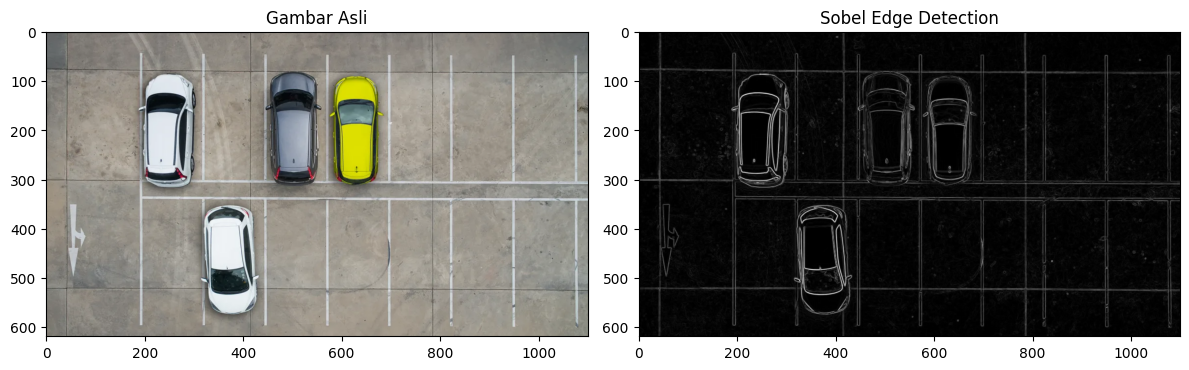

In [ ]:
# SOBEL EDGE DETECTION
image= cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')

img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

img_car = cv.cvtColor(image, cv.COLOR_BGR2RGB)


# Sobel Edge Detection
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Gambar Asli')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()


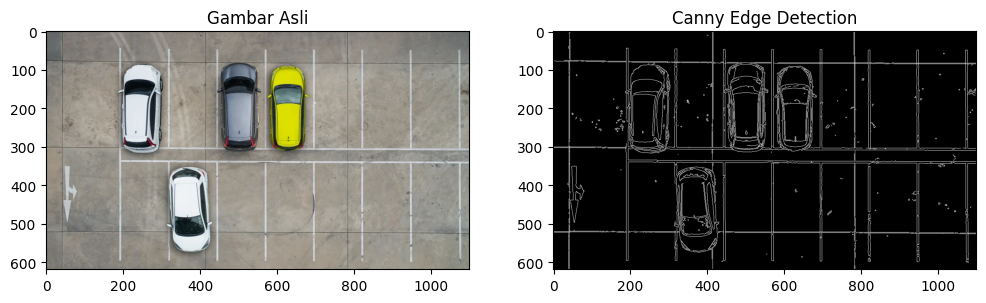

In [ ]:
# CANNY EDGE DETECTION
# Tampilkan gambar-gambar hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Gambar Asli')

# Canny Edge Detection
canny = cv.Canny(image, 100, 200)

plt.subplot(2, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')

plt.show();


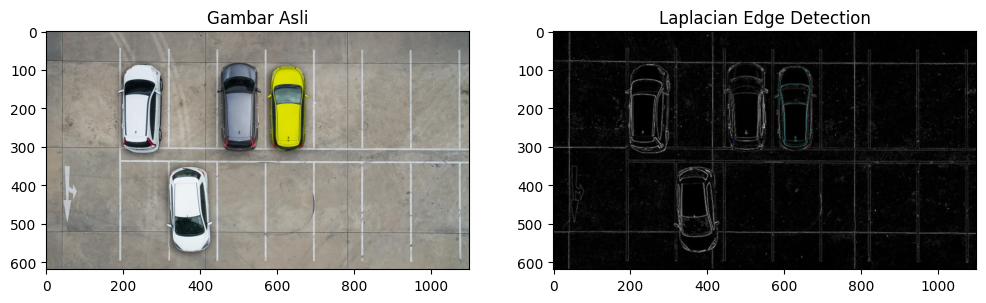

In [ ]:
# LAPLACIAN EDGE DETECTION
# Tampilkan gambar-gambar hasil
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Gambar Asli')

# Laplacian Edge Detection
laplacian = cv.Laplacian(image, cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

plt.subplot(2, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.show()

**Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:**

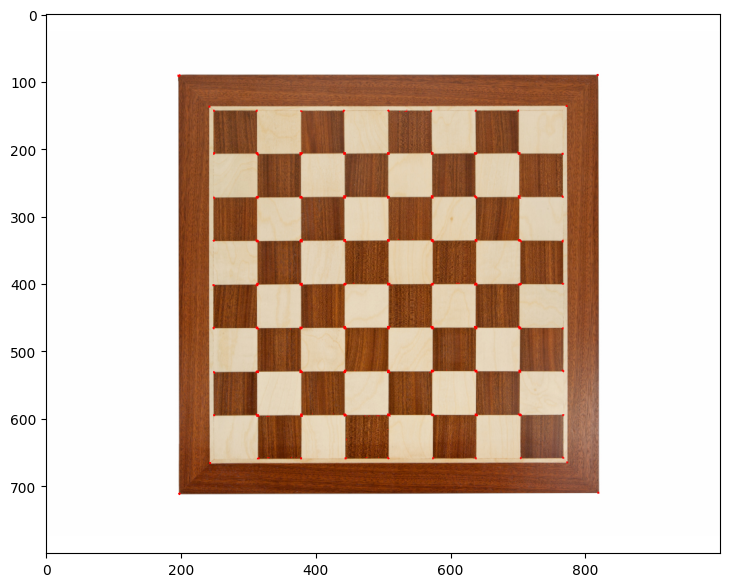

In [ ]:
# HARRIS CORNER DETECTION
#load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(15,7))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

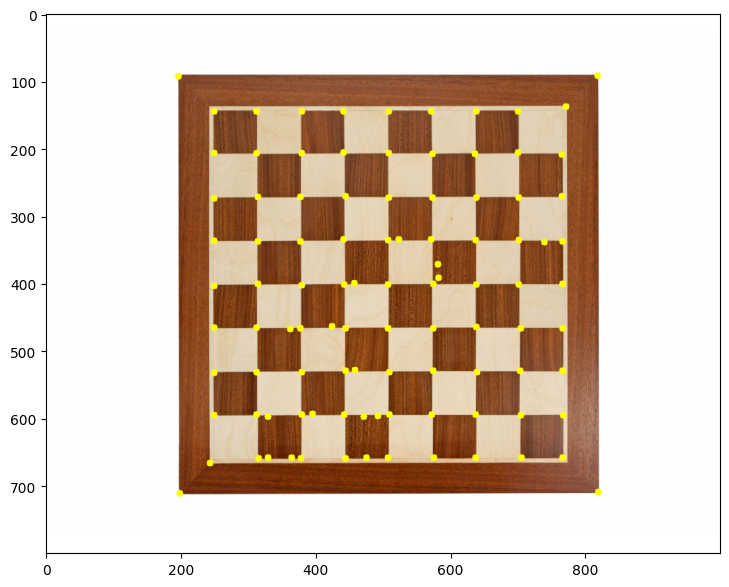

In [ ]:
# Shi-Tomasi Detection
# Load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# Deteksi sudut menggunakan Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray_img, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Konversi koordinat sudut menjadi integer
corners = np.int0(corners)

# Tandai sudut dengan warna kuning
for corner in corners:
    x, y = corner.ravel()
    cv.circle(input_img, (x, y), 5, (0, 255, 255), -1)

plt.figure(figsize=(15, 7))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
# plt.show()

**Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori**

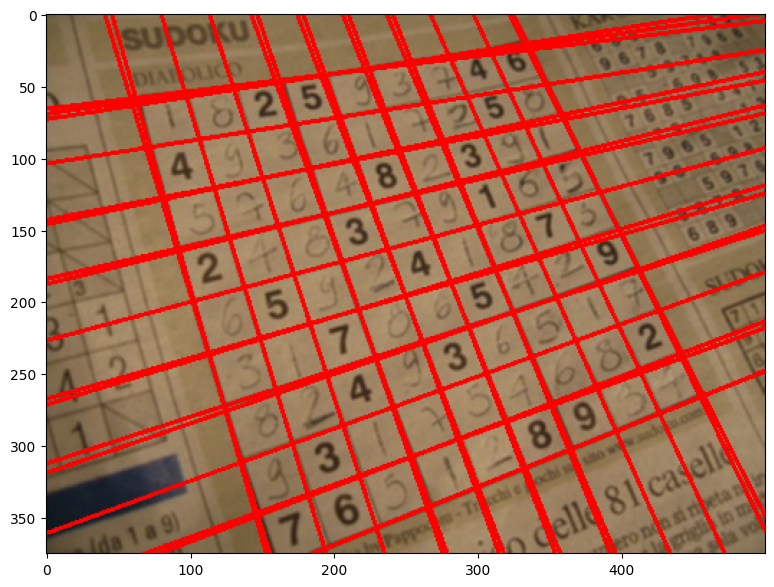

In [ ]:
# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Deteksi tepi dengan Canny
edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

# Operasi dilasi
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# Operasi erosi
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Deteksi garis dengan Hough Line Transform
lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if not lines is None and len(lines) > 0:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    plt.figure(figsize=(15, 7))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()
else:
    print('No lines were found')

**Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg**

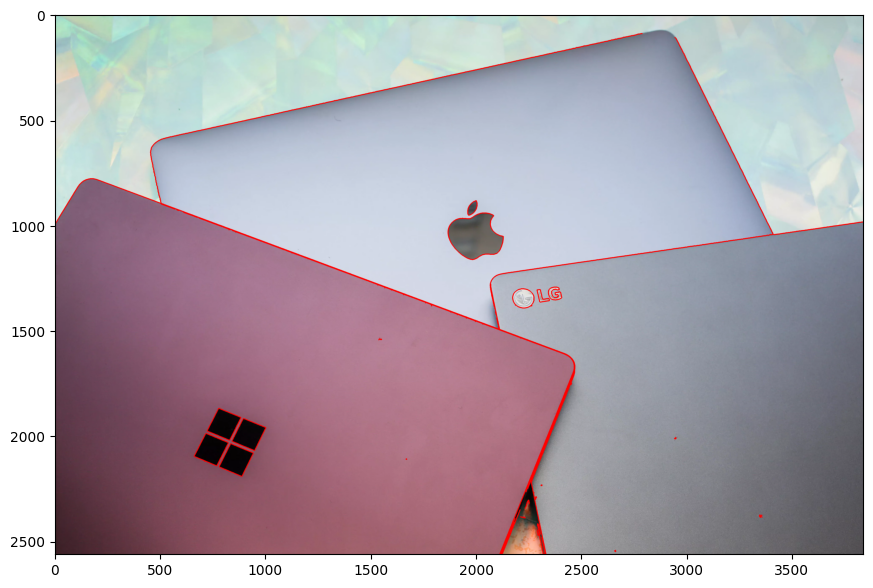

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(15, 7))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# **Pengayaan Materi KTP**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os

from google.colab.patches import cv2_imshow

**Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut**

In [ ]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP"

# Nama file yang ingin di proses
name_file = "ktp3.png"

# Looping file di direktori
if name_file in os.listdir(path_plate):
    image_path = os.path.join(path_plate, name_file)
    src = cv.imread(os.path.join(path_plate, name_file))
    blurred = src.copy()
    gray = blurred.copy()

**Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi**

In [ ]:
# Melakukan filtering
for i in range(10):
  blurred = cv.GaussianBlur(src, (5, 5), 0.5)

**Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)**

168.0 (300, 493)


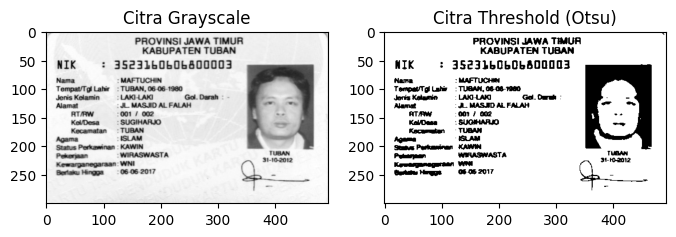

In [ ]:
# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(122)
plt.imshow(bw, cmap='gray')
plt.title('Citra Threshold (Otsu)')

plt.show()

**Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.**

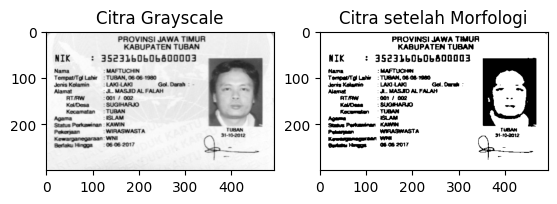

In [ ]:
# Operasi morfologi
kernel = np.ones((1, 1), np.uint8)
eroded_image = cv.erode(bw, kernel, iterations=1)

# Tampilkan citra hasil morfologi
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(132)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra setelah Morfologi')

plt.show()

**Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).**

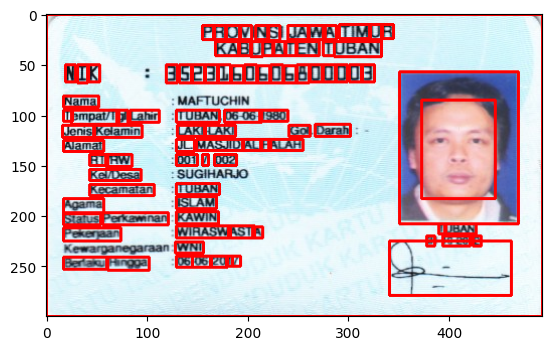

In [ ]:
# Load the image
image_path = os.path.join(path_plate, name_file)
image = cv.imread(image_path)

# Ekstraksi kontur
contours, hierarchy = cv.findContours(eroded_image.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Menampilkan gambar image dengan kontur menggunakan plt
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

# **Tugas Prktikum**

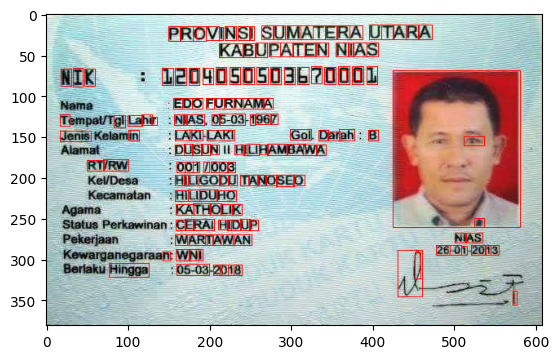

In [ ]:
image = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP/ktp5.png")

blurred = cv.GaussianBlur(image, (5, 5), 0.5)
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 3:
      cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

ktp_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()

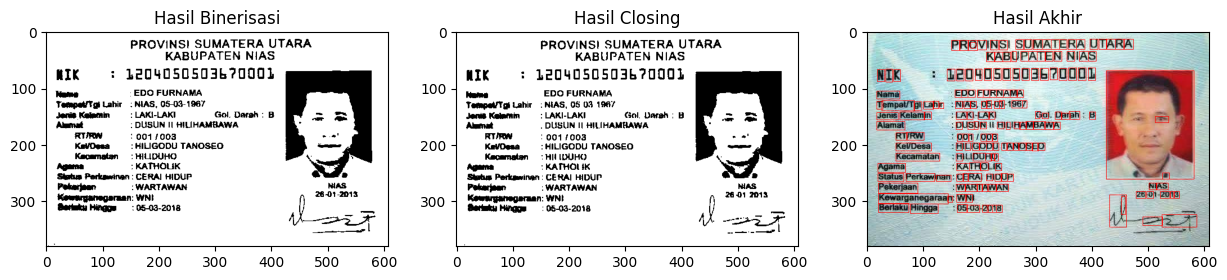

In [5]:
img_ktp5 = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP/ktp5.png')

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(img_ktp5, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
# erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))
closing = cv.morphologyEx(bw.copy(), cv.MORPH_CLOSE, (2,2))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(closing.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(img_ktp5, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    # elif h >= 8 and w >= 8 and float(ras) <= 10:
    #     cv.rectangle(img_ktp5, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar hasil bersamaan dengan hasil binerisasi dan erosi
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Hasil binerisasi
axs[0].imshow(bw, cmap='gray')
axs[0].set_title('Hasil Binerisasi')

# Hasil erosi
axs[1].imshow(closing, cmap='gray')
axs[1].set_title('Hasil Closing')

# Hasil akhir
axs[2].imshow(cv.cvtColor(img_ktp5, cv.COLOR_BGR2RGB))
axs[2].set_title('Hasil Akhir')

plt.show()